In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [125]:
df=pd.read_csv("https://github.com/devprabal/BMI-prediction-of-health-status/raw/master/500_Person_Gender_Height_Weight_Index.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [127]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


#Train Test Split

In [128]:
x,tx=train_test_split(df, random_state=2529)
val=np.zeros(6)

#Frequency Table of Gender

In [129]:
frt1={'Range':[],0:[],1:[],2:[],3:[],4:[],5:[]}

In [130]:
filt=x[x['Gender']=='Female']
farm=filt['Index'].tolist()
frt1['Range'].append('Female')
for i in farm:
  val[i]+=1
for i in range(6):
  frt1[i].append(val[i])

filt=x[x['Gender']=='Male']
farm=filt['Index'].tolist()
frt1['Range'].append('Male')
for i in farm:
  val[i]+=1
for i in range(6):
  frt1[i].append(val[i])
frt1

{'Range': ['Female', 'Male'],
 0: [5.0, 11.0],
 1: [6.0, 17.0],
 2: [27.0, 50.0],
 3: [26.0, 46.0],
 4: [56.0, 101.0],
 5: [70.0, 150.0]}

#Frequency Table of Weights

In [131]:
frt3={'Range':[],0:[],1:[],2:[],3:[],4:[],5:[]}

In [132]:
start=50
mark=52
while mark<161:
  filt = x[(x['Weight'] >=start) & (x['Weight'] < mark)]
  frt3['Range'].append((start,mark))
  farm=filt['Index'].tolist()
  for i in farm:
    val[i]+=1
  for i in range(6):
    frt3[i].append(val[i])
    val[i]=0
  start+=2
  mark+=2

#Frequency Table of Heights

In [133]:
frt2={'Range':[],0:[],1:[],2:[],3:[],4:[],5:[]}

In [134]:
start=140
mark=142
while mark<202:
  filt = x[(x['Height'] >=start) & (x['Height'] < mark)]
  frt2['Range'].append((start,mark))
  farm=filt['Index'].tolist()
  for i in farm:
    val[i]+=1
  for i in range(6):
    frt2[i].append(val[i])
    val[i]=0
  start+=2
  mark+=2

#Navie Bayes Classifier

In [135]:
def nbc(g,h,w):
  p=np.zeros(6)
  p_g=np.zeros(6)
  p_h=np.zeros(6)
  p_w=np.zeros(6)
  fp=np.zeros(6)
  for i in range(6):
    p[i]=(sum(frt1[i])+sum(frt2[i])+sum(frt3[i]))/150

  if g=='Female':
    ind=0
  elif g=='Male':
    ind=1
  for i in range(6):
    p_g[i]=frt1[i][ind]/sum(frt1[i])

  for t in frt2['Range']:
    if h>=t[0] and h<t[1]:
      break
  ind=frt2['Range'].index(t)
  for i in range(6):
    p_h[i]=frt2[i][ind]/sum(frt2[i])

  for t in frt3['Range']:
    if w>=t[0] and w<t[1]:
      break
  ind=frt3['Range'].index(t)
  for i in range(6):
    p_w[i]=frt3[i][ind]/sum(frt3[i])

  for i in range(6):
    fp[i]=p[i]*p_g[i]*p_h[i]*p_w[i]

  return np.argmax(fp)

#Testing The Model

In [136]:
N=len(tx)
para=tx.values.tolist()
n=0
act=np.zeros(N)
prd=np.zeros(N)
for i in range(N):
  prd[i]=nbc(para[i][0],para[i][1],para[i][2])
  act[i]=para[i][3]
  if prd[i]==act[i]:
    n+=1
print(n/N*100)
print(n)
print(N)

60.8
76
125


#Visualization of Actual vs Predicted results

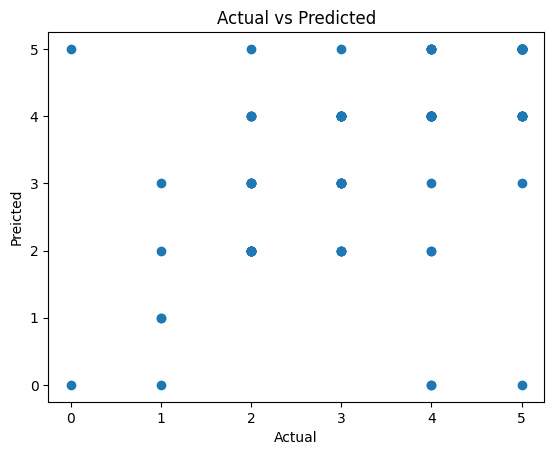

In [137]:
import matplotlib.pyplot as plt

plt.scatter(act,prd)
plt.xlabel('Actual')
plt.ylabel('Preicted')
plt.title('Actual vs Predicted')
plt.show()